## IPL Team Win Prediction

In [2]:
# Importing all the  required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
import pickle
import xgboost as xgb
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier

## Data Preprocessing

In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# reading the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IPL/matches.csv')
df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
# All Feature of the dataset.
df.columns

Index(['id', 'Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [4]:
# Feature subset selection
df_ipl = df[[ 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets',  'venue']]
df_ipl.head()

,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,venue
0,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,"Rajiv Gandhi International Stadium, Uppal"
1,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,Maharashtra Cricket Association Stadium
2,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,Saurashtra Cricket Association Stadium
3,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,Holkar Cricket Stadium
4,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,M Chinnaswamy Stadium


In [5]:
# Checking for null values
df_ipl.isna().sum()

team1             0
team2             0
toss_winner       0
toss_decision     0
result            0
dl_applied        0
winner            4
win_by_runs       0
win_by_wickets    0
venue             0
dtype: int64

In [6]:
# Removing Null Values, as Null Values are present.
df_ipl=df_ipl.dropna()

In [7]:
# After executing we observe, Null Values are removed.
df_ipl.isna().sum()


team1             0
team2             0
toss_winner       0
toss_decision     0
result            0
dl_applied        0
winner            0
win_by_runs       0
win_by_wickets    0
venue             0
dtype: int64

In [8]:
df_ipl.dl_applied.value_counts()

0    733
1     19
Name: dl_applied, dtype: int64

In [9]:
# Identifying unique teams.
df_ipl.winner.unique()

array(['Sunrisers Hyderabad', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Mumbai Indians',
       'Delhi Daredevils', 'Gujarat Lions', 'Chennai Super Kings',
       'Rajasthan Royals', 'Deccan Chargers', 'Pune Warriors',
       'Kochi Tuskers Kerala', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [10]:
# Since only the teams have changed since 2008, we will consider only those
# teams that have remained consistent and are currently active.


df_ipl = df_ipl[df_ipl['winner'].isin(['Sunrisers Hyderabad',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Mumbai Indians',
       'Royal Challengers Bangalore',
       'Chennai Super Kings', 'Rajasthan Royals',
       'Delhi Capitals'])]
df_ipl = df_ipl[df_ipl['team1'].isin(['Sunrisers Hyderabad',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Mumbai Indians',
       'Royal Challengers Bangalore',
       'Chennai Super Kings', 'Rajasthan Royals',
       'Delhi Capitals'])]
df_ipl = df_ipl[df_ipl['team2'].isin(['Sunrisers Hyderabad',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Mumbai Indians',
       'Royal Challengers Bangalore',
       'Chennai Super Kings', 'Rajasthan Royals',
       'Delhi Capitals'])]


df_ipl.head()

,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,venue
0,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,"Rajiv Gandhi International Stadium, Uppal"
6,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,Wankhede Stadium
7,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,Holkar Cricket Stadium
9,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,Wankhede Stadium
10,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,8,Eden Gardens


In [11]:
# Check whether changes are applied or not.
print("All winning teams from all the matches: ",df_ipl.winner.unique())
print("All teams: ",df_ipl.team1.unique())

All winning teams from all the matches:  ['Sunrisers Hyderabad' 'Mumbai Indians' 'Kings XI Punjab'
 'Kolkata Knight Riders' 'Chennai Super Kings'
 'Royal Challengers Bangalore' 'Rajasthan Royals' 'Delhi Capitals']
All teams:  ['Sunrisers Hyderabad' 'Kolkata Knight Riders'
 'Royal Challengers Bangalore' 'Kings XI Punjab' 'Mumbai Indians'
 'Chennai Super Kings' 'Rajasthan Royals' 'Delhi Capitals']


### Plotting graphs to observe the relationship.


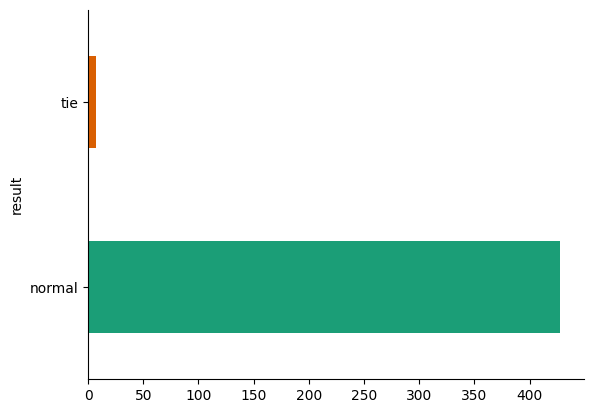

In [12]:
# Frequency Count of Result i.e., either win/loss or tie
# We observe tie values are very less.


df_ipl.groupby('result').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

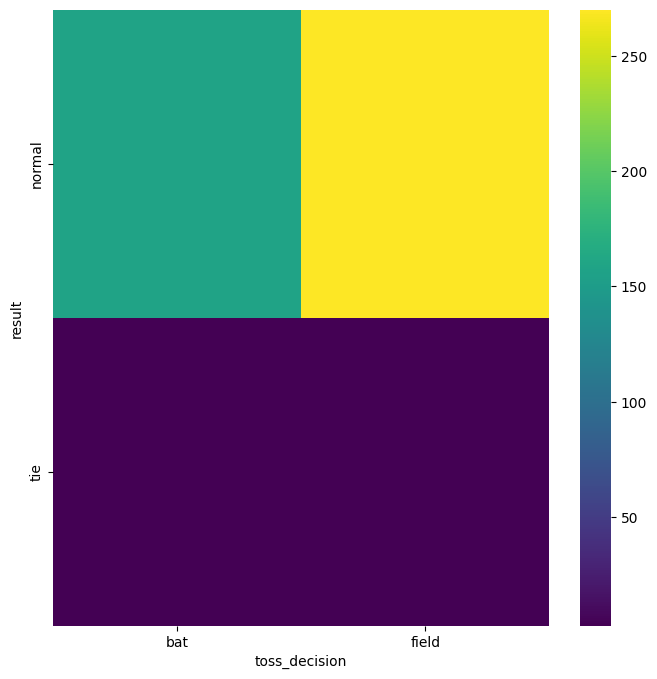

In [13]:
# toss_decision vs result

plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['result'].value_counts()
    for x_label, grp in df_ipl.groupby('toss_decision')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('toss_decision')
_ = plt.ylabel('result')

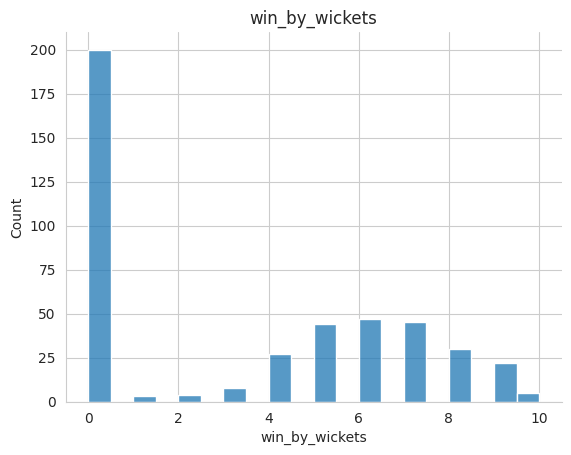

In [14]:
# win_by_wickets


# Set the style of seaborn for better UX
sns.set_style("whitegrid")

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Plot histogram with seaborn
sns.histplot(df_ipl['win_by_wickets'], bins=20, kde=False)

# Remove top and right spines
sns.despine(top=True, right=True)

# Set title
ax.set_title('win_by_wickets')

# Show the plot
plt.show()


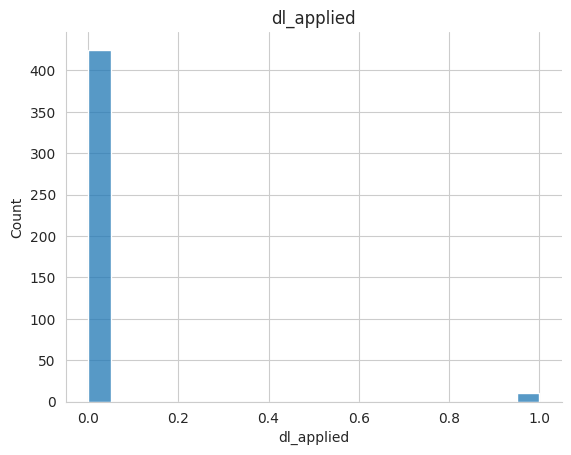

In [15]:
# dl_applied


# win_by_wickets
import seaborn as sns

# Set the style of seaborn for better UX
sns.set_style("whitegrid")

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Plot histogram with seaborn
sns.histplot(df_ipl['dl_applied'], bins=20, kde=False)

# Remove top and right spines
sns.despine(top=True, right=True)

# Set title
ax.set_title('dl_applied')

# Show the plot
plt.show()


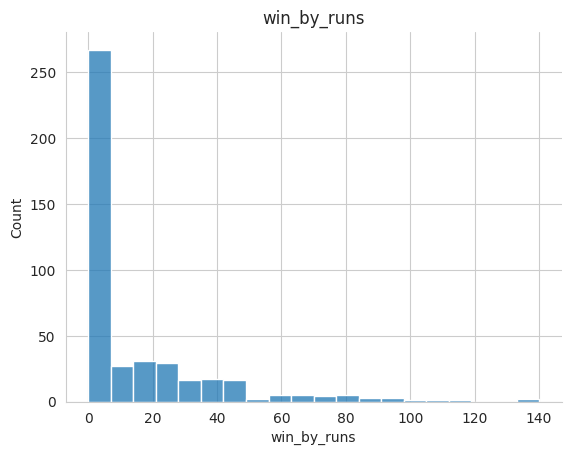

In [16]:
#  win_by_runs


# Set the style of seaborn for better UX
sns.set_style("whitegrid")

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Plot histogram with seaborn
sns.histplot(df_ipl['win_by_runs'], bins=20, kde=False)

# Remove top and right spines
sns.despine(top=True, right=True)

# Set title
ax.set_title('win_by_runs')

# Show the plot
plt.show()



Text(0.5, 1.0, 'Number of IPL matches won by each team')

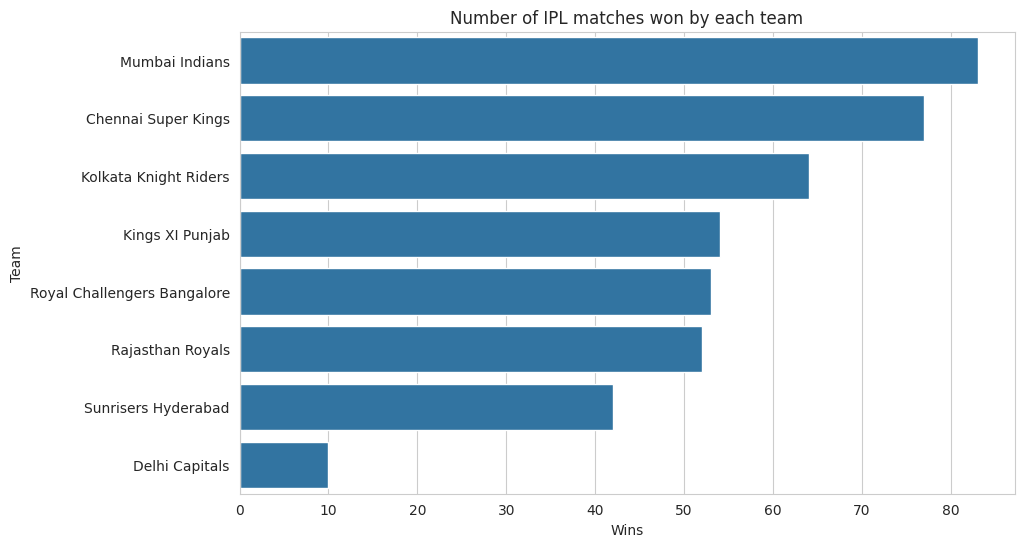

In [17]:
# No.of IPL Matches won by each team
plt.figure(figsize=(10, 6))
sns.countplot(y='winner', data=df_ipl, order=df_ipl['winner'].value_counts().index)
plt.xlabel('Wins')
plt.ylabel('Team')
plt.title('Number of IPL matches won by each team')

Text(0.5, 1.0, 'No.of IPL Matches Played in each stadium')

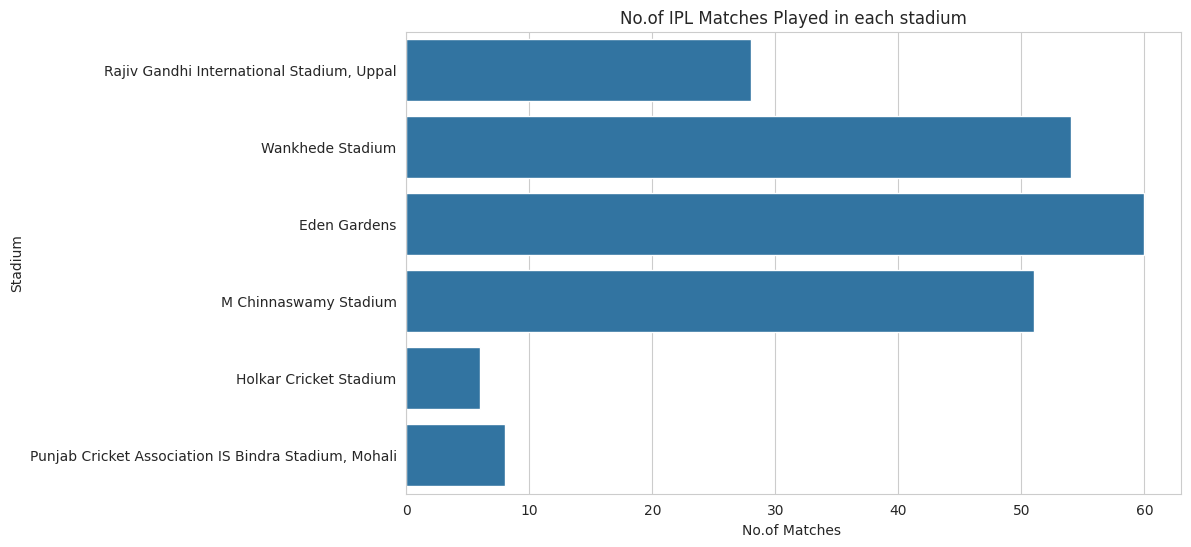

In [18]:
# No.of IPL Matches Played in each stadium

plt.figure(figsize=(10, 6))
sns.countplot(y='venue', data=df_ipl, order=df_ipl['venue'][:15].value_counts().index)
plt.xlabel('No.of Matches ')
plt.ylabel('Stadium')
plt.title("No.of IPL Matches Played in each stadium")

Text(0.5, 1.0, 'Toss Decision')

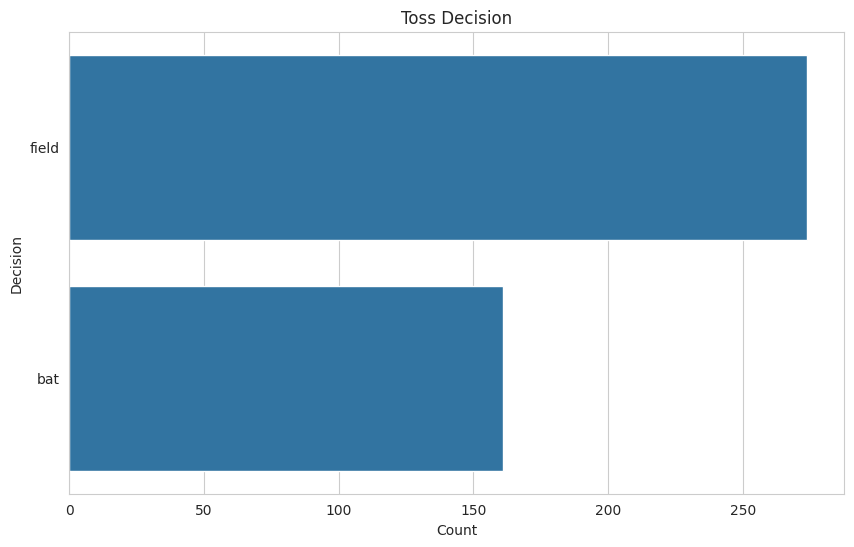

In [19]:
# Toss Decision

plt.figure(figsize=(10, 6))
sns.countplot(y='toss_decision', data=df_ipl)
plt.xlabel('Count', fontsize=10)
plt.ylabel('Decision', fontsize=10)
plt.title('Toss Decision')

In [20]:
# Using 'data' as the data frame, instead of 'df_ipl', from now on.
data = df_ipl

### Splitting the dataset & Applying Encoding

In [21]:
# Splitting the data into dependent and independent features.
x = data.drop(labels=['winner'], axis=1)
y = data['winner']
x.head()

,team1,team2,toss_winner,toss_decision,result,dl_applied,win_by_runs,win_by_wickets,venue
0,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,35,0,"Rajiv Gandhi International Stadium, Uppal"
6,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,0,4,Wankhede Stadium
7,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,0,8,Holkar Cricket Stadium
9,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,0,4,Wankhede Stadium
10,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,0,8,Eden Gardens


In [22]:
# Dumming encoding

x = pd.get_dummies(x, columns=['team1', 'team2', 'toss_winner', 'toss_decision', 'result', 'venue'],
                   prefix=['team1', 'team2', 'toss_winner', 'toss_decision', 'result', 'venue'],
                   drop_first=True)


In [23]:
print("No.of Columns of x after applying encoding: ",len(x.columns))


No.of Columns of x after applying encoding:  59


In [24]:
# label encoding
labels = y
encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(labels)


# Save the mapping between labels and encoded values
label_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

# To decode the encoded labels back to original labels
decoded_labels = encoder.inverse_transform(encoded_labels)


print("Original Labels Upto first 5 elements: \n", labels[:5])
print("\n\nEncoded Labels Upto first 5 elements: \n", encoded_labels[:5])
print("\n\nDecoded Labels Upto first 5 elements: \n", decoded_labels[:5])


Original Labels Upto first 5 elements: 
 0       Sunrisers Hyderabad
6            Mumbai Indians
7           Kings XI Punjab
9            Mumbai Indians
10    Kolkata Knight Riders
Name: winner, dtype: object


Encoded Labels Upto first 5 elements: 
 [7 4 2 4 3]


Decoded Labels Upto first 5 elements: 
 ['Sunrisers Hyderabad' 'Mumbai Indians' 'Kings XI Punjab' 'Mumbai Indians'
 'Kolkata Knight Riders']


## Implementing Different ML Models

In [25]:


# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, encoded_labels, train_size=0.8)

# Create a Random Forest Classifier with 100 trees
rfc = RandomForestClassifier(n_estimators=190, min_samples_split=4, max_features=59)

# Perform 5-fold cross-validation
scores = cross_val_score(rfc, x_train, y_train, cv=3)

# Print the accuracy for each fold
for fold, score in enumerate(scores):
    print(f"Fold {fold+1} accuracy: {score}")

# Print the mean accuracy
print(f"Mean accuracy: {scores.mean():.3f}")

Fold 1 accuracy: 0.8362068965517241
Fold 2 accuracy: 0.8793103448275862
Fold 3 accuracy: 0.8620689655172413
Mean accuracy: 0.859


In [26]:
# !pip install xgboost

In [27]:

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, encoded_labels, train_size=0.8)


# Create an XGBClassifier with early stopping
xgb = xgb.XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, early_stopping_rounds=10)

# Perform 5-fold cross-validation
scores = cross_val_score(rfc, x_train, y_train, cv=3)

# Print the accuracy for each fold
for fold, score in enumerate(scores):
    print(f"Fold {fold+1} accuracy: {score}")

# Print the mean accuracy

print(f"Mean accuracy: {scores.mean():.3f}")

Fold 1 accuracy: 0.9137931034482759
Fold 2 accuracy: 0.75
Fold 3 accuracy: 0.8362068965517241
Mean accuracy: 0.833


In [28]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(k_neighbors=2)

# Fit and apply SMOTE
x_resampled, y_resampled = smote.fit_resample(x_train, y_train)


In [29]:
from sklearn.ensemble import BaggingClassifier

# Initialize XGBoost without early stopping
xgb = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='mlogloss')

# Initialize BaggingClassifier
bagging = BaggingClassifier(estimator=xgb, n_estimators=10, random_state=0)

# Fit the model
bagging.fit(x_resampled, y_resampled)

# Predict on the test set
y_pred = bagging.predict(x_test)
# Perform 5-fold cross-validation
scores = cross_val_score(bagging,x_resampled, y_resampled, cv=3)

# Print the accuracy for each fold
for fold, score in enumerate(scores):
    print(f"Fold {fold+1} accuracy: {score}")

# Print the mean accuracy

print(f"Mean accuracy: {scores.mean():.3f}")

Fold 1 accuracy: 0.9415204678362573
Fold 2 accuracy: 0.9649122807017544
Fold 3 accuracy: 0.9470588235294117
Mean accuracy: 0.951


In [30]:
# !pip install lightgbm

### Dumping our High Accuracy Model in Pickle file

In [31]:
data = np.array(x_test.iloc[2])
data = list(data)

In [32]:
my_pred = int(bagging.predict([data])[0])
my_pred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(


4

In [33]:
decoded_labels = encoder.inverse_transform([my_pred])
decoded_labels[0]

'Mumbai Indians'

In [34]:
# To use this model on the web, we need to dump it into a pickle file.
# This will allow it to be used by Flask.

model = bagging
filename = 'predicting-matches.pkl'
pickle.dump([model,encoder] , open(filename, 'wb'))


In [35]:
# !pip install --upgrade scikit-learn